# <span style="color: darkblue; font-size: 6"> QTM 151 Final Project  </span>

<font size = "5">

<font size = "1">

# <span style="color:black"> Group 24 – Charles Cook, Chris Belz, Sean Baik   </span>

## <span style="color: darkblue; font-size: 6"> Introduction  </span>

<font size = "2">

Formula 1 is a global auto racing sport featuring 10 teams with 2 drivers per team (20 drivers total) competing over a season of about 20 to 23 races on various tracks worldwide. The format consists of practice sessions, a qualifying round, and a final race, where points are awarded to the top 10 finishers, ranging from 25 points for first place to 1 point for tenth. These points tally towards the Drivers' and Constructors' Championships, reflecting individual and team successes. 

As races span across various different circuits, countries, and conditions, performances can vary, with certain drivers/teams experiencing greater success for certain tracks. From this, we arrived at the following research question(s): 

<ul>
  <li><span style="font-size: 2; font-weight: bold">How do different characteristics of circuits (e.g. altitude, number of turns, average speed) influence race outcomes?</span></li>
  <li><span style="font-size: 2; font-weight: bold">Are certain teams better suited to certain types of circuits?</span></li>
</ul>

<font size = "2">

The research question was designed to examine if certain teams performed better in certain track characteristics (i.e. do certain teams perform better in circuits with higher altitude / more turns / greater average speed?). Method wise, points would be the metric to determine performance (the higher, the better performance), and our research will be limited to races from 2013 onwards so as to be able to adequately work with a reasonable amount of data.

## <span style="color: darkblue; font-size: 4">Import Libraries & Packages</span>

<font size = "2">
We imported the following libraries: pandas, numpy, and matplotlib.pyplot. The pandas library is used for processing datasets; numpy is used for numerical related operations; matplotlib.pyplot is used for creating graphs.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <span style="color: darkblue; font-size: 4"> Datasets & Description</span>

<font size = "2">
From the available datasets, we used the following: circuits, constructors, results, races, and a self-created dataset consisting of data the circuits' characteristics (length and number of turns)*. 

# </span>

<font size = "0.5"> *Information retrieved from: https://en.wikipedia.org/wiki/List_of_Formula_One_circuits


### <span style="color: darkblue; font-size: 3"> Circuits</span>

<font size = "2">
The circuits dataset contains the list of all circuits where Formula 1 has raced since 1950. 'circuitId' corresponds to a unique circuit, and the circuit_Ref, name, location, country, latitude, and longitude provide more information on the circuit in the global context. The 77 rows denotes a total of 77 unique circuits. The altitude data of this dataset is also a critical element in our research question.

# </span>

### <span style="color: darkblue; font-size: 3"> Constructors</span>

<font size = "2">
The constructors dataset contains a list of all constructors (teams) that have competed in the Formula 1 competition since 1950. The 211 observations denote the number of unique constructors to have competed, also reflected through the 'constructorId' figure. Other elements provide information on the name and national origin of the constructor.

# </span>

### <span style="color: darkblue; font-size: 3"> Results</span>

<font size = "2">
The results dataset contains the individual results from races and the its constructors and drivers since 1950. The number of observations (25840), theoretically, contains every result for every race of every constructor and driver. It contains detailed information on the points scored, fastestLapSpeed (which is critical to our research question), and other elements of the individial result. As it consists of many 'Id' categories (resultsId, raceId, driverId, constructorId), it will be compatible to merge with most other datasets.

# </span>

### <span style="color: darkblue; font-size: 3"> Races</span>

<font size = "2">
The races dataset contains the information of every race since 1950; 1102 races, with each raceId corresponding to a unique race. It also contains other information on the race, such as the exact date and time, circuit, and more recently, qualifying and sprint informations. The year element of this dataset provides great use in our research, as it allows us to confine and focus our research to our defined scope of data.

# </span>

### <span style="color: darkblue; font-size: 3"> Features</span>

<font size = "2">
This self-created dataset contains the total length and number of turns of every circuit within our defined research frame (circuits raced from 2013 onwards). The number of observations (34) denote the total number of circuits we will work with in our research. This dataset also allows for more convenient merging without having to further filter and subset other information.

In [79]:
circuits = pd.read_csv("data_raw/circuits.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
results = pd.read_csv("data_raw/results.csv")
races = pd.read_csv("data_raw/races.csv")
features = pd.read_csv("data_raw/circuits_details.csv")

### <span style="color: darkblue; font-size: 3"> Merging</span>

<font size = "2">
We first used the dictionary function to change the term 'name' across multiple datasets to more a specific classification. This would also address the reassignment of 'name' variables when merging. 

# </span>

We then merged circuits with races, selecting necessary variables such as the circuit Id, name, location, country, and altitude. We omitted the unnecessary variables from races to make the dataset less messy. We merged on circuitId. Subsequent merges selected the necessary variables, and merged on common variables. More merging procedures were executed during data manipulation. Most of these merges were done to add on nececessary information to a table following grouping and aggregating procedures so as to add complete context (for example, after calculating mean points for each constructor of each circuit, we merged the corresponding team name for each constructor and the correspnoding number of turns for each circuit).

In [80]:

replace_name_races = {"name":"grand_prix"}
races = races.rename(columns = replace_name_races)

replace_name_circuits = {"name":"circuit_name"}
circuits = circuits.rename(columns = replace_name_circuits)

replace_name_features = {"name":"circuit_name"}
features = features.rename(columns = replace_name_features)

replace_name_constructors = {"name":"team_name"}
constructors = constructors.rename(columns = replace_name_constructors)



# Merge circuits with races on circuitId, omitting unnecessary variables such as lat, lng, url
circuits_merged_1 = pd.merge(circuits[['circuitId', 'circuit_name', 
                                       'location', 'country', 'alt']],
                             races[['raceId', 'year', 'circuitId', 'grand_prix']],
                             on = 'circuitId',
                             how = 'left')


# Subset all races and circuits observations to 2013 onwards in line with our specified research range
circuits_merged_1 = circuits_merged_1.query("year >= 2013")


# Merge datasets with dataset including features of circuits within specified time frame
circuits_merged_2 = pd.merge(circuits_merged_1[['circuitId', 'circuit_name', 
                                                'grand_prix', 'location', 'country', 
                                                'raceId', 'year', 'alt']],
                             features[['circuit_name', 'length', 'turns']],
                             on = 'circuit_name',
                             how = 'left').sort_values("circuit_name", ascending = True)


# Merge fastestLapTime and fastestLapSpeed onto primary datasset
# Finalize aggregation of three elements of research question (circuit speed, turns, altitude) into one dataset
circuits_merged_3 = pd.merge(circuits_merged_2,
                             results[['raceId', 'constructorId', 
                                      'points', 'fastestLapTime', 'fastestLapSpeed']],
                             on = 'raceId',
                             how = 'left')


master_data = pd.merge(circuits_merged_3,
                       constructors[['constructorId', 'team_name', 'nationality']],
                       on = 'constructorId',
                       how = 'left')

# Convert fastestLapSpeed to numeric to be able to execute other operations
master_data['fastestLapSpeed'] = pd.to_numeric(master_data['fastestLapSpeed'], errors='coerce')
master_data['alt'] = pd.to_numeric(master_data['alt'], errors = 'coerce')

# Create new variable in dataset "average_speed" by computing mean of fastestLapSpeeds for each circuit
master_data['average_speed'] = (master_data.groupby('circuitId')['fastestLapSpeed']
                                           .transform('mean'))

In [81]:
# create separate, working datasets for each metric

circuits_alt = (master_data.dropna()
                           .groupby('circuitId')
                           .agg(circuit_name = ('circuit_name', 'first'), 
                                grand_prix = ('grand_prix', 'first'), 
                                alt = ('alt', 'first'))
                           .sort_values(by = 'alt', ascending = True))
def adjusted_log(value):
    if value == 0:
        return 0
    else:
        log_value = np.log(abs(value))
        return -log_value if value < 0 else log_value

circuits_alt['alt_log'] = circuits_alt['alt'].apply(adjusted_log)

display(circuits_alt)



circuits_turns = (master_data.dropna()
                             .groupby('circuitId')
                             .agg(circuit_name = ('circuit_name', 'first'),
                                  grand_prix = ('grand_prix', 'first'), 
                                  turns = ('turns', 'first'))
                             .sort_values(by = 'turns', ascending = True))
display(circuits_turns)



circuits_speed = (master_data.dropna()
                             .groupby('circuitId')
                             .agg(circuit_name = ('circuit_name', 'first'), 
                                  grand_prix = ('grand_prix', 'first'), 
                                  average_speed = ('average_speed', 'first'))
                             .sort_values(by = 'average_speed', ascending = True))
display(circuits_speed)


,circuit_name,grand_prix,alt,alt_log
circuitId,,,,
73,Baku City Circuit,European Grand Prix,-7.0,-1.945910
35,Korean International Circuit,Korean Grand Prix,0.0,0.000000
71,Sochi Autodrom,Russian Grand Prix,2.0,0.693147
24,Yas Marina Circuit,Abu Dhabi Grand Prix,3.0,1.098612
17,Shanghai International Circuit,Chinese Grand Prix,5.0,1.609438
39,Circuit Park Zandvoort,Dutch Grand Prix,6.0,1.791759
3,Bahrain International Circuit,Bahrain Grand Prix,7.0,1.945910
6,Circuit de Monaco,Monaco Grand Prix,7.0,1.945910
1,Albert Park Grand Prix Circuit,Australian Grand Prix,10.0,2.302585


,circuit_name,grand_prix,turns
circuitId,,,
70,Red Bull Ring,Styrian Grand Prix,10
14,Autodromo Nazionale di Monza,Italian Grand Prix,11
7,Circuit Gilles Villeneuve,Canadian Grand Prix,13
4,Circuit de Barcelona-Catalunya,Spanish Grand Prix,14
5,Istanbul Park,Turkish Grand Prix,14
39,Circuit Park Zandvoort,Dutch Grand Prix,14
76,Autodromo Internazionale del Mugello,Tuscan Grand Prix,14
11,Hungaroring,Hungarian Grand Prix,14
18,Autódromo José Carlos Pace,Brazilian Grand Prix,15


,circuit_name,grand_prix,average_speed
circuitId,,,
6,Circuit de Monaco,Monaco Grand Prix,153.099880
15,Marina Bay Street Circuit,Singapore Grand Prix,165.802025
11,Hungaroring,Hungarian Grand Prix,187.836591
32,Autódromo Hermanos Rodríguez,Mexican Grand Prix,189.674145
69,Circuit of the Americas,United States Grand Prix,195.027868
35,Korean International Circuit,Korean Grand Prix,195.413773
4,Circuit de Barcelona-Catalunya,Spanish Grand Prix,195.714422
17,Shanghai International Circuit,Chinese Grand Prix,195.718319
24,Yas Marina Circuit,Abu Dhabi Grand Prix,195.985340


Text(0, 0.5, 'Average Speed (km/h)')

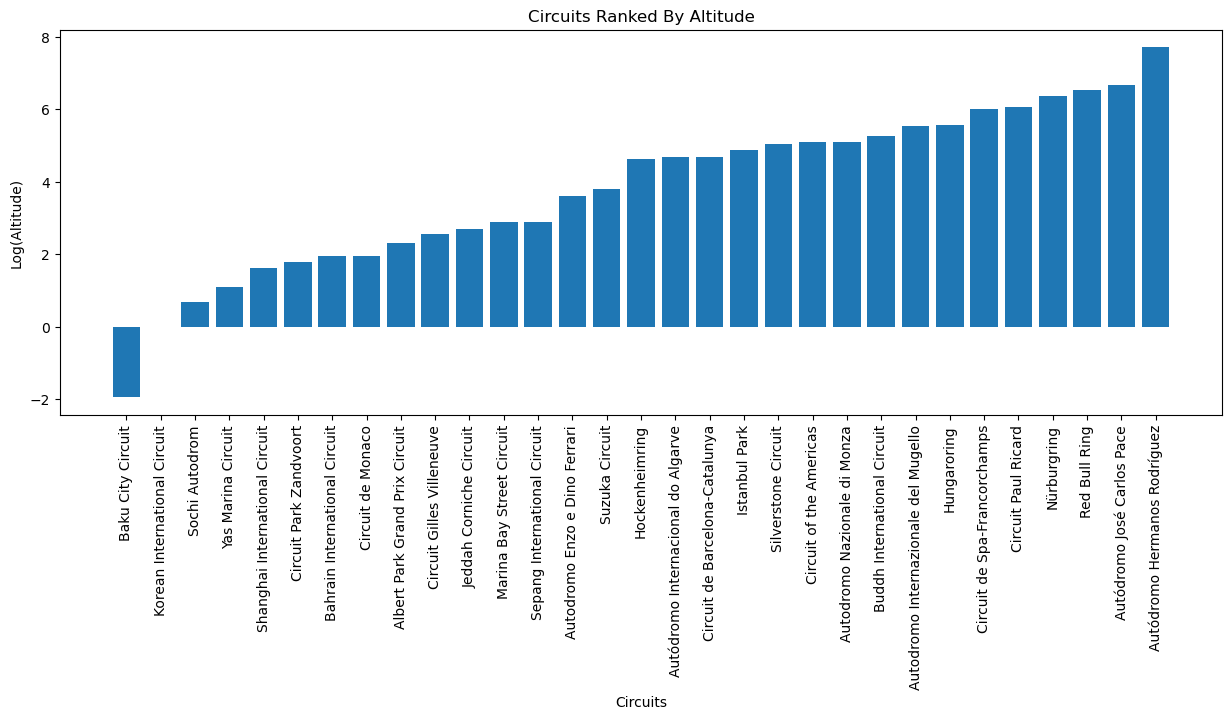

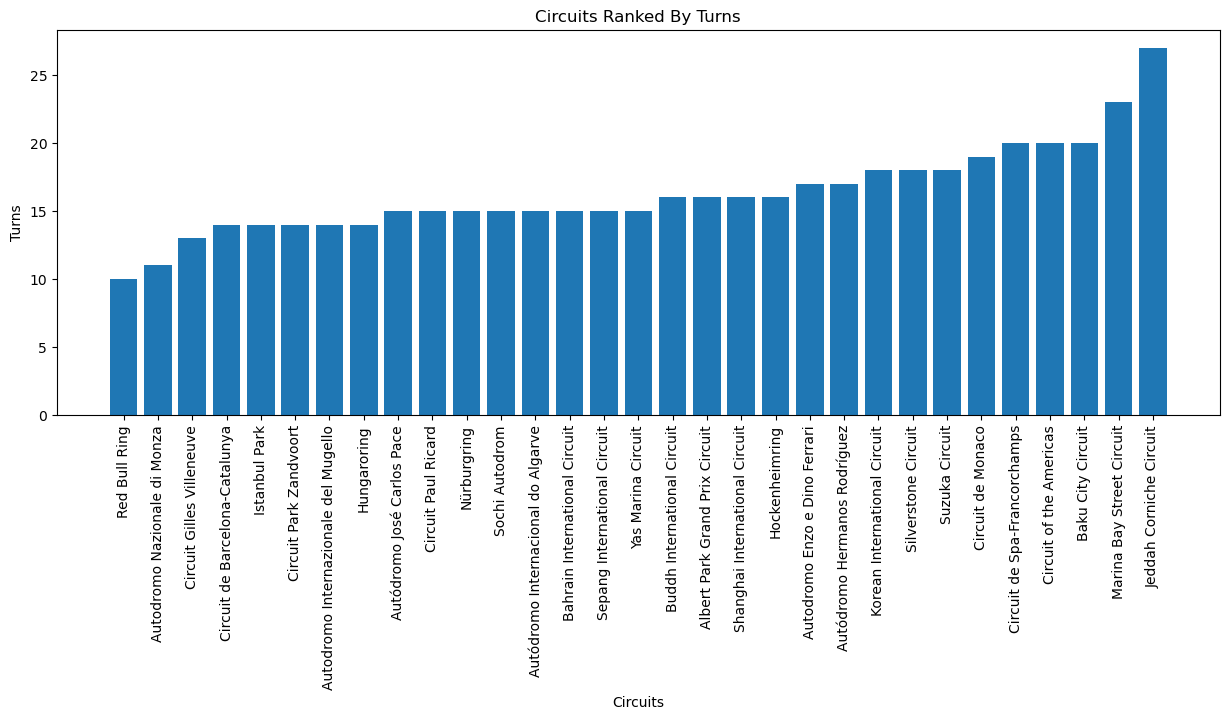

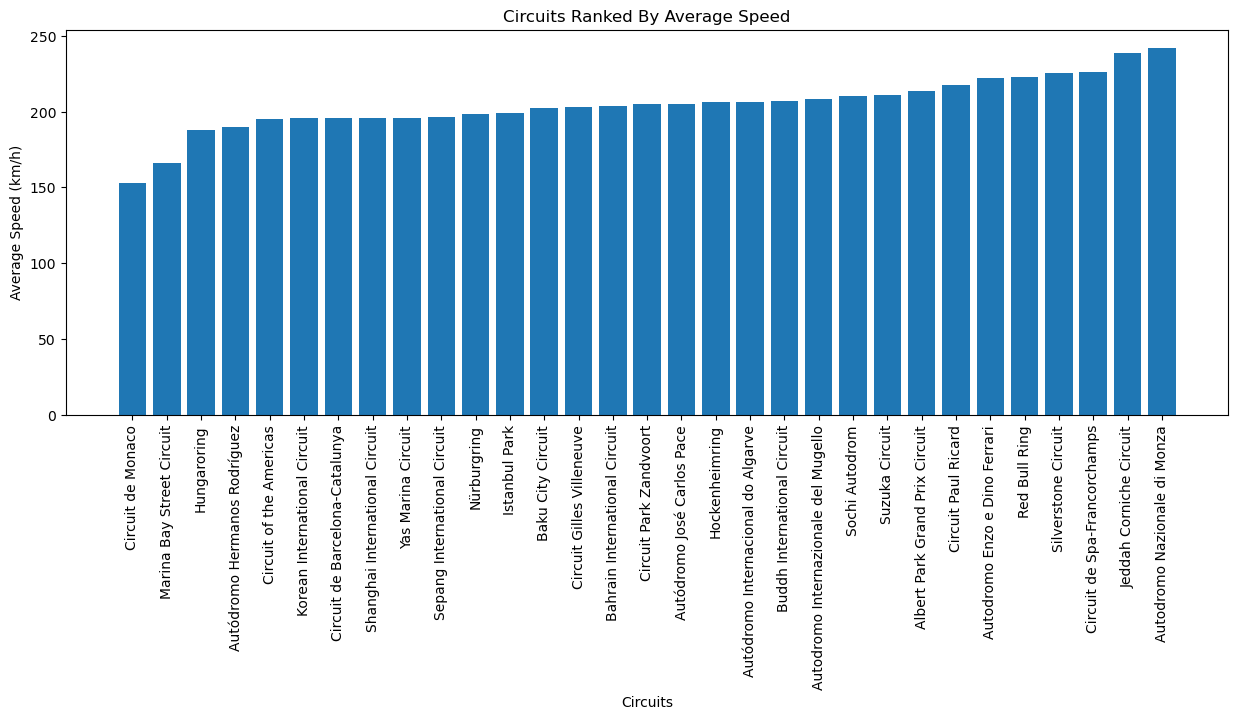

In [82]:
# create bar charts, ordering circuits by metric
# from this we can see the circuits with the highest/lowest value for each metric


plt.figure(figsize=(15, 5))
plt.bar(circuits_alt['circuit_name'], circuits_alt['alt_log'])
plt.title('Circuits Ranked By Altitude')
plt.xlabel('Circuits')
plt.xticks(rotation=90)
plt.ylabel('Log(Altitude)')


plt.figure(figsize=(15, 5))
plt.bar(circuits_turns['circuit_name'], circuits_turns['turns'])
plt.title('Circuits Ranked By Turns')
plt.xlabel('Circuits')
plt.xticks(rotation=90)
plt.ylabel('Turns')


plt.figure(figsize=(15, 5))
plt.bar(circuits_speed['circuit_name'], circuits_speed['average_speed'])
plt.title('Circuits Ranked By Average Speed')
plt.xlabel('Circuits')
plt.xticks(rotation=90)
plt.ylabel('Average Speed (km/h)')


In [83]:
# finding the best performing constructor for each circuit

constructorsRanked_alt = (master_data.dropna()
                                     .groupby(['circuit_name', 'constructorId'])
                                     .agg(team_name = ('team_name', 'first'),
                                          mean_points = ('points', 'mean'),
                                          alt = ('alt', 'first'))
                                     .reset_index()
                                     .groupby('circuit_name')
                                     .apply(lambda x: x.nlargest(1, 'mean_points'))
                                     .reset_index(drop = True)
                                     .sort_values(by = 'alt', ascending = False))
constructorsRanked_alt = constructorsRanked_alt[['circuit_name', 'team_name', 
                                                 'alt', 'mean_points']]
display(constructorsRanked_alt)


print()


constructorsRanked_turns = (master_data.dropna()
                                       .groupby(['circuit_name', 'constructorId'])
                                       .agg(team_name = ('team_name', 'first'),
                                            mean_points = ('points', 'mean'),
                                            turns = ('turns', 'first'))
                                       .reset_index()
                                       .groupby('circuit_name')
                                       .apply(lambda x: x.nlargest(1, 'mean_points'))
                                       .reset_index(drop = True)
                                       .sort_values(by = 'turns', ascending = False))
constructorsRanked_turns = constructorsRanked_turns[['circuit_name', 'team_name', 
                                                     'turns', 'mean_points']]
display(constructorsRanked_turns)


print()


constructorsRanked_avgSpeed = (master_data.dropna()
                                          .groupby(['circuit_name', 'constructorId'])
                                          .agg(team_name = ('team_name', 'first'),
                                            mean_points = ('points', 'mean'),
                                            average_speed = ('average_speed', 'first'))
                                          .reset_index()
                                          .groupby('circuit_name')
                                          .apply(lambda x: x.nlargest(1, 'mean_points'))
                                          .reset_index(drop = True)
                                          .sort_values(by = 'average_speed', 
                                                       ascending = False))
constructorsRanked_avgSpeed = constructorsRanked_avgSpeed[['circuit_name', 'team_name', 
                                                     'average_speed', 'mean_points']]
display(constructorsRanked_avgSpeed)

,circuit_name,team_name,alt,mean_points
4,Autódromo Hermanos Rodríguez,Mercedes,2227.0,15.500000
6,Autódromo José Carlos Pace,Mercedes,785.0,16.444444
24,Red Bull Ring,Mercedes,678.0,16.181818
23,Nürburgring,Lotus F1,578.0,16.500000
12,Circuit Paul Ricard,Mercedes,432.0,17.125000
15,Circuit de Spa-Francorchamps,Mercedes,401.0,16.529412
18,Hungaroring,Mercedes,264.0,15.315789
2,Autodromo Internazionale del Mugello,Mercedes,255.0,22.000000
9,Buddh International Circuit,Mercedes,194.0,13.000000
3,Autodromo Nazionale di Monza,Mercedes,162.0,14.750000


,circuit_name,team_name,turns,mean_points
20,Jeddah Corniche Circuit,Red Bull,27,13.750000
22,Marina Bay Street Circuit,Ferrari,23,14.642857
15,Circuit de Spa-Francorchamps,Mercedes,20,16.529412
8,Baku City Circuit,Mercedes,20,13.166667
16,Circuit of the Americas,Mercedes,20,16.777778
14,Circuit de Monaco,Mercedes,19,14.166667
29,Suzuka Circuit,Mercedes,18,16.562500
27,Silverstone Circuit,Mercedes,18,17.952381
21,Korean International Circuit,Lotus F1,18,16.500000
4,Autódromo Hermanos Rodríguez,Mercedes,17,15.500000


,circuit_name,team_name,average_speed,mean_points
3,Autodromo Nazionale di Monza,Mercedes,241.856545,14.750000
20,Jeddah Corniche Circuit,Red Bull,238.651500,13.750000
15,Circuit de Spa-Francorchamps,Mercedes,226.305494,16.529412
27,Silverstone Circuit,Mercedes,225.245479,17.952381
24,Red Bull Ring,Mercedes,222.769838,16.181818
1,Autodromo Enzo e Dino Ferrari,Mercedes,221.776810,12.500000
12,Circuit Paul Ricard,Mercedes,217.285590,17.125000
0,Albert Park Grand Prix Circuit,Mercedes,213.324442,15.437500
29,Suzuka Circuit,Mercedes,210.767525,16.562500
28,Sochi Autodrom,Mercedes,210.348576,19.437500


### <span style="color: darkblue; font-size: 3"> Brief Analysis</span>

<font size = "2">
These tables show the best performing constructors for each circuit, ranked in order by the selected metric (altitude, turns, average speed). While it appears this gives indication as to which constructors performs best for the give metric, it mostly shows how well a constructor performs for that specific circuit. It does not provide much insight into whether the altitude / number of turns / average speed is the underlying driver behind the constructors' performances.

# </span>
# </span>

Thus, for a more deeper analysis is done through the following code: 

In [116]:
## create the initial dataframe
figure_1 = (master_data.dropna()
                       .groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index()
                       .groupby('constructorId')
                       .apply(lambda x: x.nlargest(5, 'mean_points'))
                       .reset_index(drop=True))

## convert constructorId from string to numeric
figure_1['constructorId'] = pd.to_numeric(figure_1['constructorId'])

## merge to add team_name based on constructorId
figure_1 = pd.merge(figure_1,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

## merge to add alt based on circuit_name
figure_1 = pd.merge(figure_1,
                    master_data[['circuit_name', 'alt']].drop_duplicates(),
                    on = 'circuit_name',
                    how = 'left')

## create log values of altitude to rescale
def adjusted_log(value):
    if value == 0:
        return 0
    else:
        log_value = np.log(abs(value))
        return -log_value if value < 0 else log_value
figure_1['alt_log'] = figure_1['alt'].apply(adjusted_log)



figure1_table = (figure_1.groupby('team_name')
                         .agg(avg_alt = ('alt_log', 'mean'),
                              avg_points = ('mean_points', 'mean'))
                         .reset_index())

figure1_table

,team_name,avg_alt,avg_points
0,Alfa Romeo,3.418009,2.433333
1,AlphaTauri,2.678496,5.656667
2,Alpine F1 Team,5.344878,7.550000
3,Aston Martin,2.061590,4.500000
4,Caterham,4.253927,0.000000
5,Ferrari,2.988659,13.023960
6,Force India,2.436034,5.919697
7,Haas F1 Team,4.279267,2.205714
8,Lotus F1,3.175185,11.300000
9,Manor Marussia,5.656685,0.066667


In [117]:
# same format and procedure is applied for turns

figure_2 = (master_data.dropna()
                       .groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index()
                       .groupby('constructorId')
                       .apply(lambda x: x.nlargest(5, 'mean_points'))
                       .reset_index(drop=True))

figure_2['constructorId'] = pd.to_numeric(figure_2['constructorId'])

figure_2 = pd.merge(figure_2,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

figure_2 = pd.merge(figure_2,
                    master_data[['circuit_name', 'turns']].drop_duplicates(),
                    on = 'circuit_name',
                    how = 'left')



figure2_table = (figure_2.groupby('team_name')
                         .agg(avg_turns=('turns', 'mean'),
                              avg_points = ('mean_points', 'mean'))
                         .reset_index())

figure2_table

,team_name,avg_turns,avg_points
0,Alfa Romeo,15.2,2.433333
1,AlphaTauri,15.4,5.656667
2,Alpine F1 Team,16.4,7.550000
3,Aston Martin,19.4,4.500000
4,Caterham,14.6,0.000000
5,Ferrari,16.4,13.023960
6,Force India,17.0,5.919697
7,Haas F1 Team,15.4,2.205714
8,Lotus F1,16.0,11.300000
9,Manor Marussia,13.8,0.066667


In [118]:
# same format and procedure is applied for average speed

figure_3 = (master_data.dropna()
                       .groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index()
                       .groupby('constructorId')
                       .apply(lambda x: x.nlargest(5, 'mean_points'))
                       .reset_index(drop=True))

figure_3['constructorId'] = pd.to_numeric(figure_3['constructorId'])

figure_3 = pd.merge(figure_3,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

figure_3 = pd.merge(figure_3,
                    master_data[['circuit_name', 'average_speed']].drop_duplicates(),
                    on = 'circuit_name',
                    how = 'left')



figure3_table = (figure_3.groupby('team_name')
                         .agg(avg_speed = ('average_speed', 'mean'),
                              avg_points = ('mean_points', 'mean'))
                         .reset_index())

figure3_table

,team_name,avg_speed,avg_points
0,Alfa Romeo,209.355071,2.433333
1,AlphaTauri,213.973825,5.656667
2,Alpine F1 Team,207.269265,7.550000
3,Aston Martin,190.728678,4.500000
4,Caterham,214.211607,0.000000
5,Ferrari,193.102134,13.023960
6,Force India,203.888882,5.919697
7,Haas F1 Team,214.433055,2.205714
8,Lotus F1,203.562414,11.300000
9,Manor Marussia,214.563675,0.066667


In [119]:
## assigning colors to each constructor

colors = {'Alfa Romeo':'darkred', 'AlphaTauri':'royalblue', 'Alpine F1 Team':'slateblue', 
          'Aston Martin':'olive', 'Ferrari':'red', 'Force India':'orchid', 
          'Haas F1 Team':'grey', 'Lotus F1':'gold', 'Manor Marussia':'lightcoral',
          'McLaren':'orange', 'Mercedes':'mediumturquoise', 'Racing Point':'fuchsia',
          'Red Bull':'navy', 'Renault':'yellow', 'Sauber':'green',
          'Toro Rosso':'black', 'Williams':'lavender', 'Caterham':'teal', 'Marussia':'peru'}

# <span style="color: darkblue; font-size: 5">Data Visualization 1 </span>

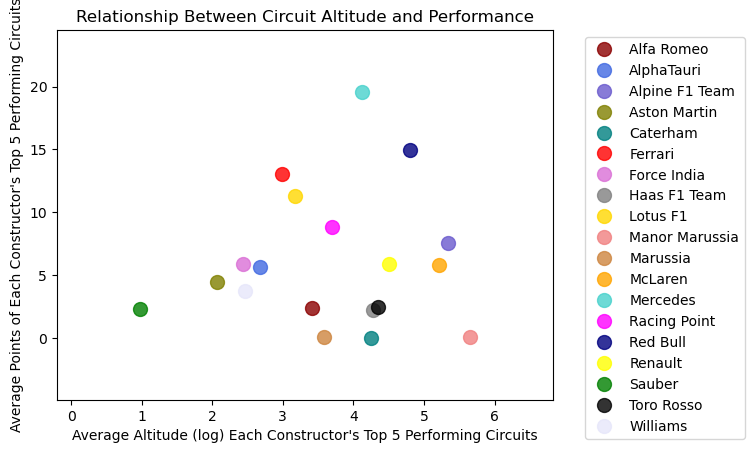

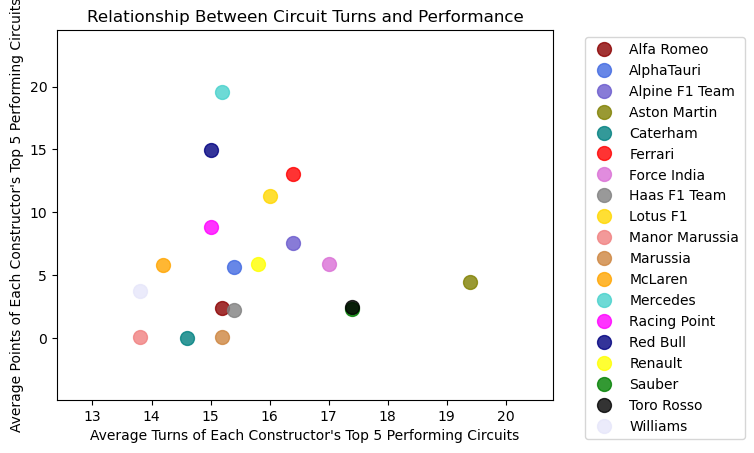

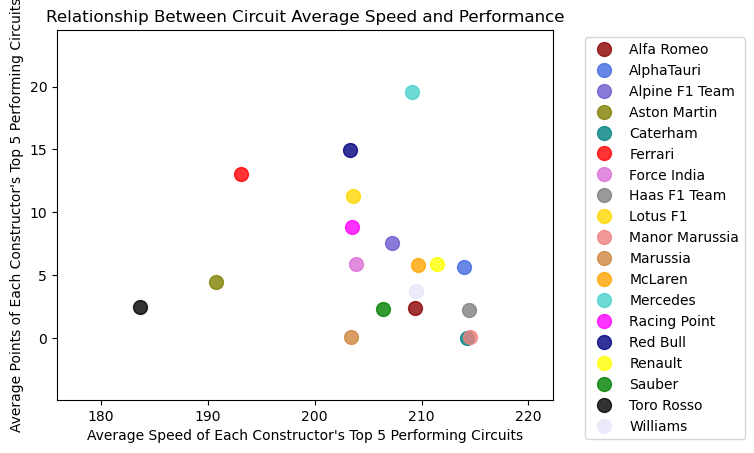

In [122]:
figure1_graph = figure1_table.groupby('team_name')

fig, ax = plt.subplots()
ax.margins(0.25) 
for name, group in figure1_graph:
    ax.plot(group.avg_alt, group.avg_points, 
            marker='o', linestyle='', 
            ms = 10, label = name, 
            alpha = 0.8, color = colors[name])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Average Points of Each Constructor's Top 5 Performing Circuits")
plt.xlabel("Average Altitude (log) Each Constructor's Top 5 Performing Circuits")
plt.title("Relationship Between Circuit Altitude and Performance")
plt.show()



figure2_graph = figure2_table.groupby('team_name')

fig, ax = plt.subplots()
ax.margins(0.25) 
for name, group in figure2_graph:
    ax.plot(group.avg_turns, group.avg_points, 
            marker='o', linestyle='', 
            ms = 10, label = name, 
            alpha = 0.8, color = colors[name])
ax.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.ylabel("Average Points of Each Constructor's Top 5 Performing Circuits")
plt.xlabel("Average Turns of Each Constructor's Top 5 Performing Circuits")
plt.title("Relationship Between Circuit Turns and Performance")
plt.show()



figure3_graph = figure3_table.groupby('team_name')

fig, ax = plt.subplots()
ax.margins(0.25) 
for name, group in figure3_graph:
    ax.plot(group.avg_speed, group.avg_points, 
            marker='o', linestyle='', 
            ms = 10, label = name, 
            alpha = 0.8, color = colors[name])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Average Points of Each Constructor's Top 5 Performing Circuits")
plt.xlabel("Average Speed of Each Constructor's Top 5 Performing Circuits")
plt.title("Relationship Between Circuit Average Speed and Performance")
plt.show()

## <span style="color: darkblue; font-size: 4">Findings (part 1) </span>

<font size = "2">
Firstly, by ranking circuits by the number of turns, altitude, and average speed, it becomes apparent how and by how much the terrain differs depending on at which circuit the race takes place. Furthermore, we found the average points of the top 5 performances of each team’s racers (performance indicated by points scored) and the circuits at which those performances occurred, and then found the average altitude, turns, and speed of those circuits. This indicates to us what conditions are conducive to more successful races for each team. It is also apparent that teams that perform relatively better on circuits with more turns (like Toro Rosso and Aston Martin) also perform relatively better on circuits with a lower average speed, which makes sense because more turns would likely make it more difficult to maintain a faster speed due to having to decelerate to navigate them. The same is true for teams that perform relatively better with fewer turns and a greater average speed such as Manor Marussia and Haas F1 Team. Our findings also indicate that the altitude at which teams perform relatively best wildly varies.

# <span style="color: darkblue; font-size: 4">Data Visualization 2 </span>

,constructorId,team_name,circuit_name,alt_log,mean_points
0,1.0,McLaren,Albert Park Grand Prix Circuit,2.302585,4.333333
1,1.0,McLaren,Autodromo Enzo e Dino Ferrari,3.610918,8.000000
2,1.0,McLaren,Autodromo Internazionale del Mugello,5.541264,4.000000
3,1.0,McLaren,Autodromo Nazionale di Monza,5.087596,4.350000
4,1.0,McLaren,Autódromo Hermanos Rodríguez,7.708411,1.076923
...,...,...,...,...,...
497,214.0,Alpine F1 Team,Red Bull Ring,6.519147,2.800000
498,214.0,Alpine F1 Team,Silverstone Circuit,5.030438,4.500000
499,214.0,Alpine F1 Team,Sochi Autodrom,0.693147,4.000000
500,214.0,Alpine F1 Team,Suzuka Circuit,3.806662,9.000000


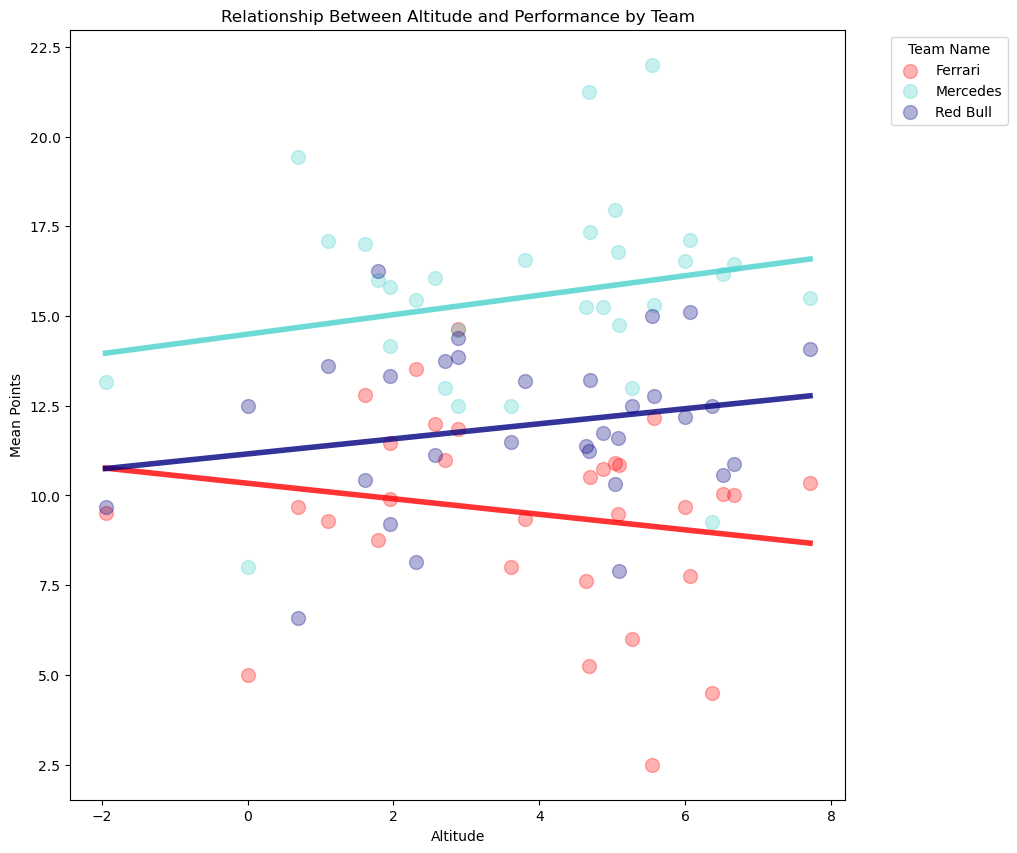

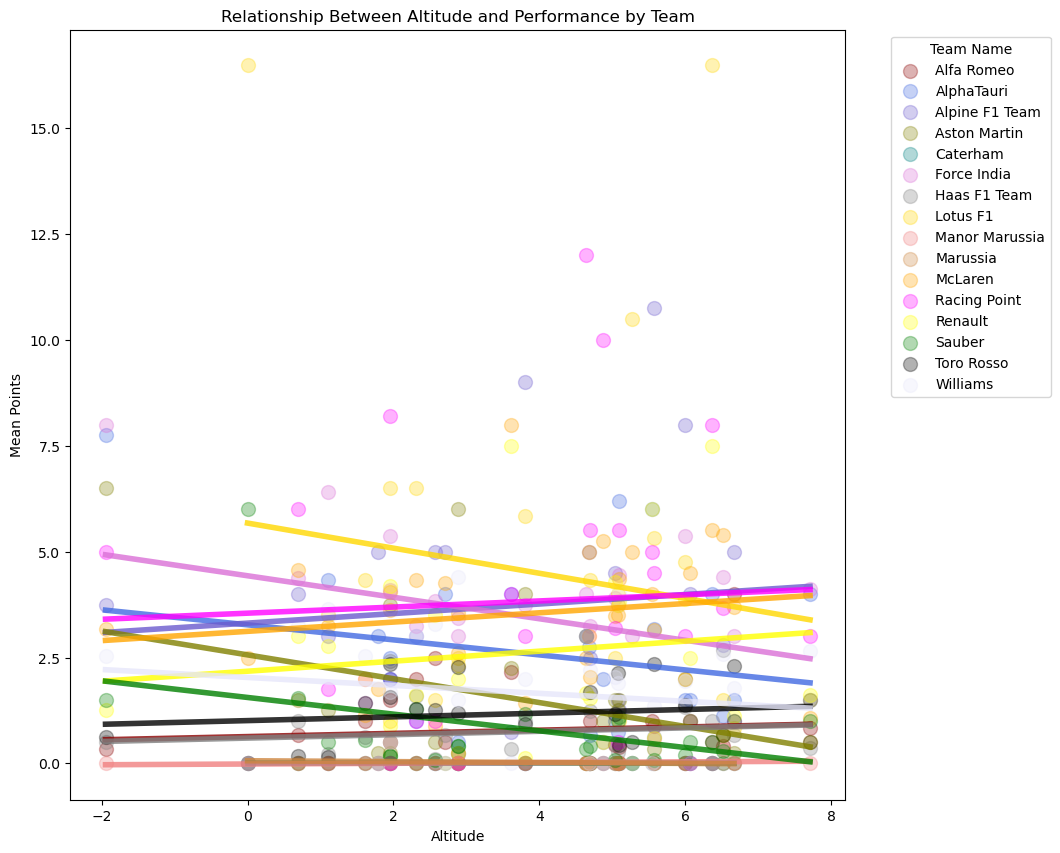

In [123]:
## Modelling performance based on altitude of the circuit

figure_4 = (master_data.dropna()
                       .groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index())

figure_4 = pd.merge(figure_4,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

figure_4 = pd.merge(figure_4,
                    circuits_alt[['circuit_name', 'alt_log']],
                    on =  'circuit_name',
                    how = 'left')

figure_4 = figure_4[['constructorId', 'team_name', 'circuit_name', 'alt_log', 'mean_points']]

display(figure_4)


figure4_graph = figure_4.groupby('team_name')

# Separate top teams and the rest for easier visual comparison
top_teams = ['Mercedes', 'Red Bull', 'Ferrari']
top_teams_data = figure_4[figure_4['team_name'].isin(top_teams)]
other_teams_data = figure_4[~figure_4['team_name'].isin(top_teams)]

def plot_data(data, title_suffix):
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.margins(0.05)
    groups = data.groupby('team_name')

    for name, group in groups:
        ax.scatter(group['alt_log'], group['mean_points'], s = 100, 
                   label = name, alpha = 0.3, color = colors[name])
        if len(group['alt_log']) > 1:
            slope, intercept = np.polyfit(group['alt_log'], group['mean_points'], 1)
            x_values = np.linspace(group['alt_log'].min(), group['alt_log'].max(), 100)
            y_values = slope * x_values + intercept
            ax.plot(x_values, y_values, color = colors[name], 
                    alpha = 0.8, linewidth = 4)
    ax.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left', title = "Team Name")
    plt.xlabel("Altitude")
    plt.ylabel("Mean Points")
    plt.title("Relationship Between Altitude and Performance by Team")
    plt.show()

plot_data(top_teams_data, 'Top Teams')
plot_data(other_teams_data, 'Other Teams')

,constructorId,team_name,circuit_name,turns,mean_points
0,1.0,McLaren,Albert Park Grand Prix Circuit,16,4.333333
1,1.0,McLaren,Autodromo Enzo e Dino Ferrari,17,8.000000
2,1.0,McLaren,Autodromo Internazionale del Mugello,14,4.000000
3,1.0,McLaren,Autodromo Nazionale di Monza,11,4.350000
4,1.0,McLaren,Autódromo Hermanos Rodríguez,17,1.076923
...,...,...,...,...,...
497,214.0,Alpine F1 Team,Red Bull Ring,10,2.800000
498,214.0,Alpine F1 Team,Silverstone Circuit,18,4.500000
499,214.0,Alpine F1 Team,Sochi Autodrom,15,4.000000
500,214.0,Alpine F1 Team,Suzuka Circuit,18,9.000000


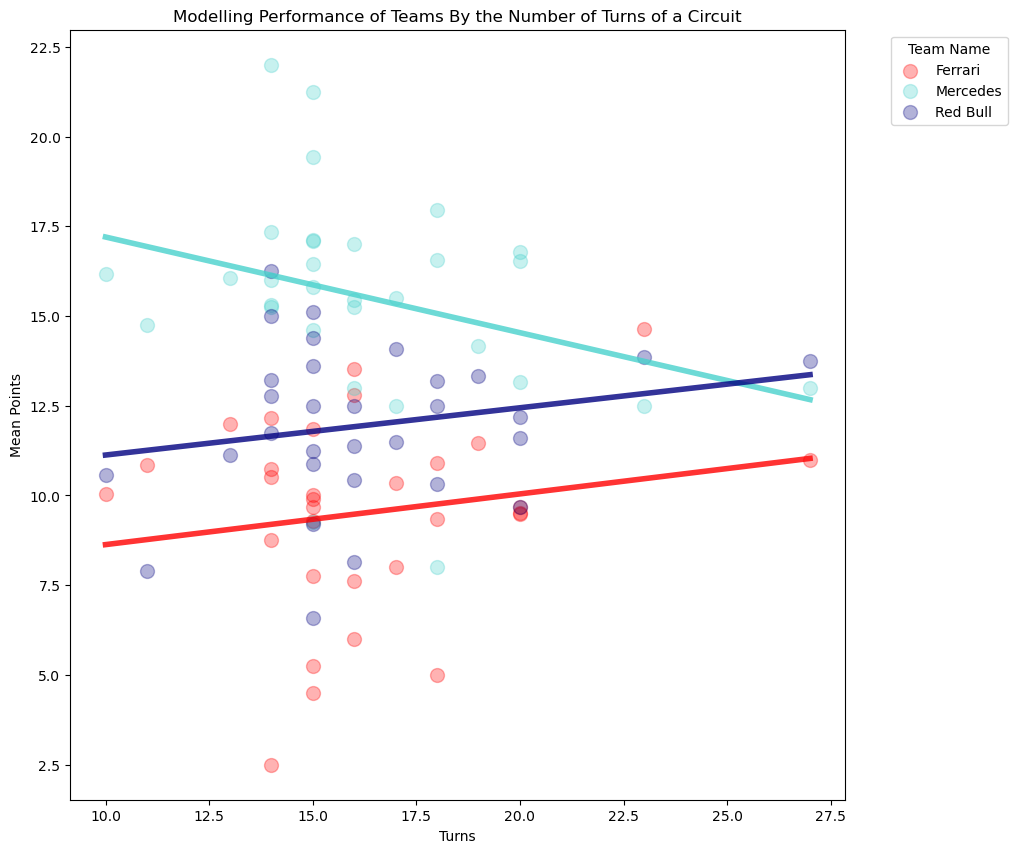

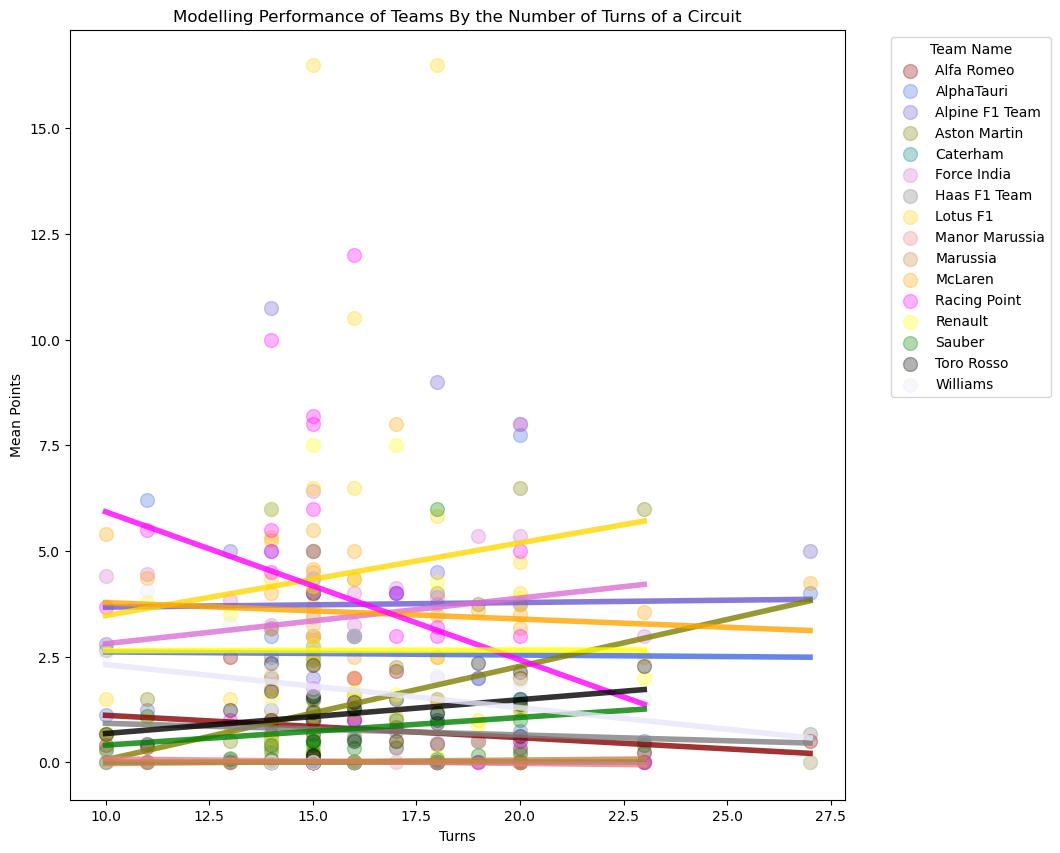

In [105]:
## Modelling performance based on the number of turns of the circuit

figure_5 = (master_data.dropna()
                       .groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index())

figure_5 = pd.merge(figure_5,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

figure_5 = pd.merge(figure_5,
                    circuits_turns[['circuit_name', 'turns']],
                    on =  'circuit_name',
                    how = 'left')

figure_5 = figure_5[['constructorId', 'team_name', 'circuit_name', 'turns', 'mean_points']]

display(figure_5)


figure5_graph = figure_5.groupby('team_name')

top_teams = ['Mercedes', 'Red Bull', 'Ferrari']
top_teams_data = figure_5[figure_5['team_name'].isin(top_teams)]
other_teams_data = figure_5[~figure_5['team_name'].isin(top_teams)]

def plot_data(data, title_suffix):
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.margins(0.05)
    groups = data.groupby('team_name')

    for name, group in groups:
        ax.scatter(group['turns'], group['mean_points'], s = 100, 
                   label = name, alpha = 0.3, color = colors[name])
        if len(group['turns']) > 1:
            slope, intercept = np.polyfit(group['turns'], group['mean_points'], 1)
            x_values = np.linspace(group['turns'].min(), group['turns'].max(), 100)
            y_values = slope * x_values + intercept
            ax.plot(x_values, y_values, color = colors[name], 
                    alpha = 0.8, linewidth = 4)
    ax.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left', title = "Team Name")
    plt.xlabel("Turns")
    plt.ylabel("Mean Points")
    plt.title("Modelling Performance of Teams By the Number of Turns of a Circuit")
    plt.show()

plot_data(top_teams_data, 'Top Teams')
plot_data(other_teams_data, 'Other Teams')

,constructorId,team_name,circuit_name,average_speed,mean_points
0,1.0,McLaren,Albert Park Grand Prix Circuit,213.324442,4.333333
1,1.0,McLaren,Autodromo Enzo e Dino Ferrari,221.776810,8.000000
2,1.0,McLaren,Autodromo Internazionale del Mugello,208.053278,4.000000
3,1.0,McLaren,Autodromo Nazionale di Monza,241.856545,4.350000
4,1.0,McLaren,Autódromo Hermanos Rodríguez,189.674145,1.076923
...,...,...,...,...,...
497,214.0,Alpine F1 Team,Red Bull Ring,222.769838,2.800000
498,214.0,Alpine F1 Team,Silverstone Circuit,225.245479,4.500000
499,214.0,Alpine F1 Team,Sochi Autodrom,210.348576,4.000000
500,214.0,Alpine F1 Team,Suzuka Circuit,210.767525,9.000000


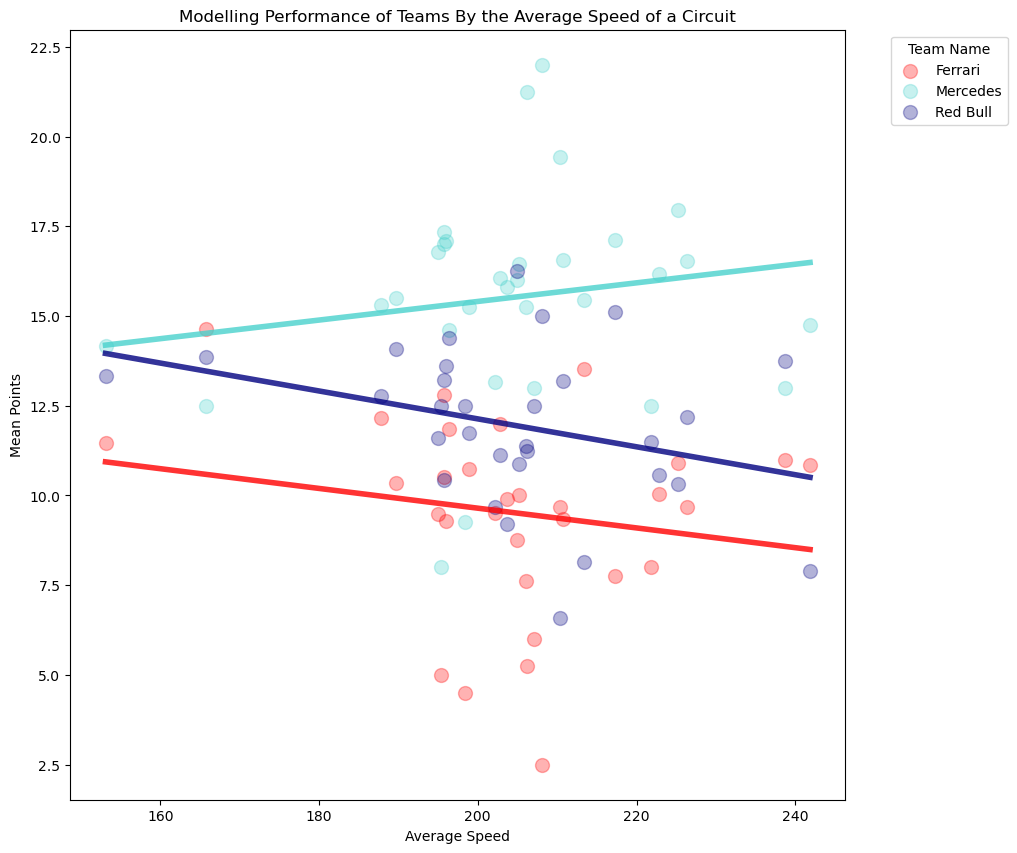

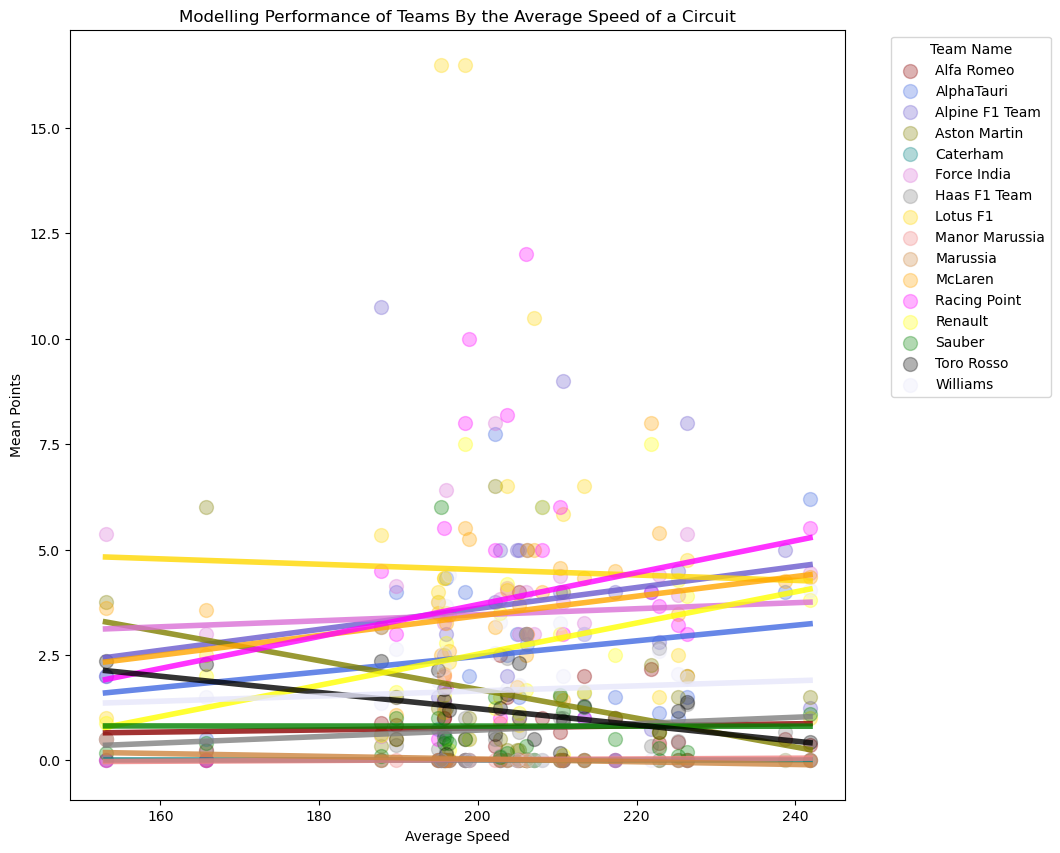

In [107]:
## Modelling performance based on the avergae speed of the circuit

figure_6 = (master_data.dropna()
                       .groupby(['constructorId', 'circuit_name'])
                       .agg(mean_points = ('points', 'mean'))
                       .reset_index())

figure_6 = pd.merge(figure_6,
                    master_data[['constructorId', 'team_name']].drop_duplicates(),
                    on = 'constructorId',
                    how = 'left')

figure_6 = pd.merge(figure_6,
                    circuits_speed[['circuit_name', 'average_speed']],
                    on = 'circuit_name',
                    how = 'left')

figure_6 = figure_6[['constructorId', 'team_name', 'circuit_name', 'average_speed', 'mean_points']]

display(figure_6)


figure6_graph = figure_6.groupby('team_name')

top_teams = ['Mercedes', 'Red Bull', 'Ferrari']
top_teams_data = figure_6[figure_6['team_name'].isin(top_teams)]
other_teams_data = figure_6[~figure_6['team_name'].isin(top_teams)]

def plot_data(data, title_suffix):
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.margins(0.05)
    groups = data.groupby('team_name')

    for name, group in groups:
        ax.scatter(group['average_speed'], group['mean_points'], s = 100, 
                   label = name, alpha = 0.3, color = colors[name])
        if len(group['average_speed']) > 1:
            slope, intercept = np.polyfit(group['average_speed'], group['mean_points'], 1)
            x_values = np.linspace(group['average_speed'].min(), group['average_speed'].max(), 100)
            y_values = slope * x_values + intercept
            ax.plot(x_values, y_values, color = colors[name], 
                    alpha = 0.8, linewidth = 4)
    ax.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left', title = "Team Name")
    plt.xlabel("Average Speed")
    plt.ylabel("Mean Points")
    plt.title("Modelling Performance of Teams By the Average Speed of a Circuit")
    plt.show()

plot_data(top_teams_data, 'Top Teams')
plot_data(other_teams_data, 'Other Teams')

## <span style="color: darkblue; font-size: 4">Findings (part 2) </span>

<font size = "2">
With a regression analysis, we were able to accurately plot how each team’s performances vary as the altitude, average speed, and turns changed by circuit. Of the top 3 teams (Ferrari, Mercedes, and Red Bull), Ferrari and Red Bull both had a positive correlation of performance with the number of turns and negative correlation with the average speed, while Mercedes had the opposite (performed better with less turns, more speed). For altitude, both Mercedes and Red Bull performed better at high altitudes while Ferrari performed better at lower altitudes. Among the other teams, there is not as much of a pronounced difference in performance based on conditions. This can mainly be attributed to the fact that the other teams generally perform worse on average, but we can still see some relationship. The same tradeoff between turns and average speed can be seen in Racing Point and Sauber: Racing Point performs worse for circuits with more turns while Sauber performs better, and Racing Point performs better for circuits with higher average speed while Sauber peforms worse.

## <span style="color: darkblue; font-size: 4"> Describing Main Columns </span>

<font size = "2">
For data visualization 1, the primary table consists of the team name, average altitude / turns / average speed, and average points. Breaking this down, the average speed value shows the mean average speed of the circuits in which the constructors performed their best, and the average points is the mean number of points the constructor achieved in those circuits. Adding a little more context, these values were obtained through these steps:

# </span>
<ul>
  <li><span style="font-size: 2; font-weight: bold">Computed the average number of points each constructor achieved at each circuit. This gives a baseline indication as to how well, on average, a constructor performs at each circuit.</span></li>
  <li><span style="font-size: 2; font-weight: bold">Next, the top 5 circuits for each constructor was extracted based on which circuits each constructor had the highest average points. In other words, these observations reflected which circuits the constructors were performing best in.</span></li>
  <li><span style="font-size: 2; font-weight: bold">We then took the corresponding altitude / turns / average speed for each of the circuits in the table.</span></li>
  <li><span style="font-size: 2; font-weight: bold">The average altitude / turns / average speed of each constructor's top 5 circuits were computed. This would indicate which kind of circuits each constructor performs best in in terms of the altitude / turns / average speed</span></li>
  <li><span style="font-size: 2; font-weight: bold">The average number of points of each constructor's top 5 circuits were also computed to understand roughly how many points, on average, each constructor was achieving at circuits with their most favorable conditions.</span></li>
  <li><span style="font-size: 2; font-weight: bold">These values were then plotted on a scatterplot to see what kind of circuit conditions constructors were performing relatively better on, and this gave a good comparative visualization between constructors</span></li>
</ul>

To summarize, this table showed the average altitude / turns / mean speed of circuits in which constructors performed best in, and the average number of points they achieved from these most favorable conditions.


# </span>
# </span>
# </span>


<font size = "2">
For data visualization 2, the primary table consists of team name, altitude / turns / average speed, and average points. As the main objective of this taublar aggregation is to model it using regression, the average points simply computes the average points achieved by each constructor for each circuit. The altitude / turns / average speed is simply the corresponding value for each circuit.

## <span style="color: darkblue; font-size: 4">Data Cleaning</span>

<font size = "2">
We used a lot of data cleaning methods to make our data more legible and easier to work with, as well as make the process and reading of subsequent aggregations simpler to follow. For example, in the initial merging process to create the master_data dataset, we subsetted the observations to races from 2013 onward using 'query', and we converted fastestLapSpeed and altitude from strings to numeric variables using pd_numeric (and coerce). Other data cleaning procedures include dropping N/A values during the grouping and aggregation procedures (.dropna()), and using a function to ignore 0 values and replace negative values to their absolute values when calcaulting the log of altitudes log values to avoid -inf and NaN values which would affect our data aggregaton and subsequent calculations.

## <span style="color: darkblue; font-size: 4">Last Neat Feature</span>

<font size = "2">
Using the information above, knowing the circuits corresponding to each circuitId and the characteristics of each circuit (altitude / turns / average speed), the following dictionary can be used to immediately see the average points achieved by each constructor for the inputted circuit, in order of the highest to lowest performing.

In [126]:
circuit_points = {Id: pd.DataFrame(
    master_data[["constructorId", "points", "circuitId"]].query("circuitId == @Id").groupby("constructorId")
                                                         .agg(mean_points = ("points", "mean"))
                                                         .sort_values(by = "mean_points", ascending = False)) 
                                                         for Id in master_data[ "circuitId"]}

display(circuit_points[1])
display(circuit_points[13])
display(circuit_points[24])

,mean_points
constructorId,
131.0,15.437500
6.0,12.687500
9.0,6.625000
208.0,4.333333
1.0,4.062500
10.0,3.250000
214.0,3.000000
3.0,2.812500
51.0,2.000000


,mean_points
constructorId,
131.0,14.425000
9.0,10.975000
6.0,8.825000
10.0,4.916667
214.0,4.750000
4.0,3.500000
208.0,3.166667
211.0,3.000000
3.0,2.250000


,mean_points
constructorId,
131.0,17.100000
9.0,13.600000
6.0,9.300000
10.0,6.416667
213.0,4.333333
3.0,3.650000
1.0,3.250000
214.0,3.000000
4.0,2.500000
